In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
import torch.nn.functional as F
import torch

In [2]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [3]:
def train(model, device, train_loader, optimizer, epoch, log_interval=10):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print(
                "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                    epoch,
                    batch_idx * len(data),
                    len(train_loader.dataset),
                    100.0 * batch_idx / len(train_loader),
                    loss.item(),
                )
            )

In [4]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(
                output, target, reduction="sum"
            ).item()  # sum up batch loss
            pred = output.argmax(
                dim=1, keepdim=True
            )  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print(
        "\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
            test_loss,
            correct,
            len(test_loader.dataset),
            100.0 * correct / len(test_loader.dataset),
        )
    )

In [5]:
def train_model():
    device = "cpu"
    epochs = 1
    train_kwargs = {"batch_size": 256}
    test_kwargs = {"batch_size": 1000}
    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
    )
    dataset1 = datasets.MNIST("../data", train=True, download=True, transform=transform)
    dataset2 = datasets.MNIST("../data", train=False, transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1, **train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)
    model = MNISTNet().to(device)
    optimizer = optim.Adadelta(model.parameters(), lr=1.0)

    scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
        scheduler.step()
    return model

In [6]:
my_model = train_model()


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.314445
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.948491
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.487324
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.376731
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.246071
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.324017
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.276454
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.171830
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.231364
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.188706
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.190419
Train Epoch: 1 [28160/60000 (47%)]	Loss: 0.195810
Train Epoch: 1 [30720/60000 (51%)]	Loss: 0.196728
Train Epoch: 1 [33280/60000 (55%)]	Loss: 0.141274
Train Epoch: 1 [35840/60000 (60%)]	Loss: 0.181821
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.171672
Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.139756
Train Epoch: 1 [43520/60000 (72%)]	Loss: 0.155212
Train Epoch: 1 [46080/60000 (77%)]	Loss: 0.194698
Train Epoch: 1 [48640/60000 (81%)]	Loss: 0.045000
Train Epoc

In [7]:
# prepare data for inference
transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
    )
inputs = datasets.MNIST("../data", train=False, transform=transform)
dataset = torch.utils.data.DataLoader(inputs, batch_size=1)

In [8]:
import numpy as np

model_input = list(dataset)[0]

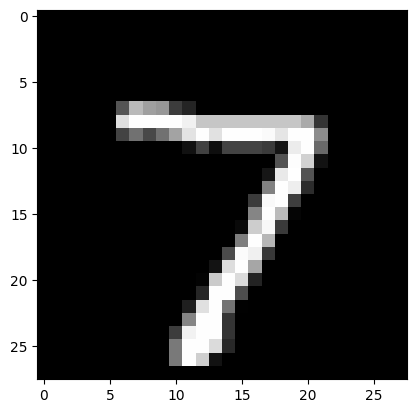

In [9]:
import matplotlib.pyplot as plt

# Function to show an image
def imshow(img):
    img = img * 0.3081 + 0.1307  # Inverse normalization
    img = img.squeeze()  # Remove the batch dimension (1 in this case)
    plt.imshow(img, cmap='gray')
    plt.show()

imshow(model_input[0])

In [10]:
inputs = torch.tensor(
                model_input[0], dtype=list(my_model.parameters())[0].dtype, device='cpu'
            )

/var/folders/qg/6sb9klt17nbc4_jz2gx49s240000gn/T/ipykernel_63499/2345019260.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(


In [11]:
my_model(inputs).tolist()

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


[[-11.899744987487793,
  -15.166419982910156,
  -9.420734405517578,
  -10.510014533996582,
  -15.596588134765625,
  -14.708137512207031,
  -20.577083587646484,
  -0.00029380773776210845,
  -13.930066108703613,
  -8.639815330505371]]

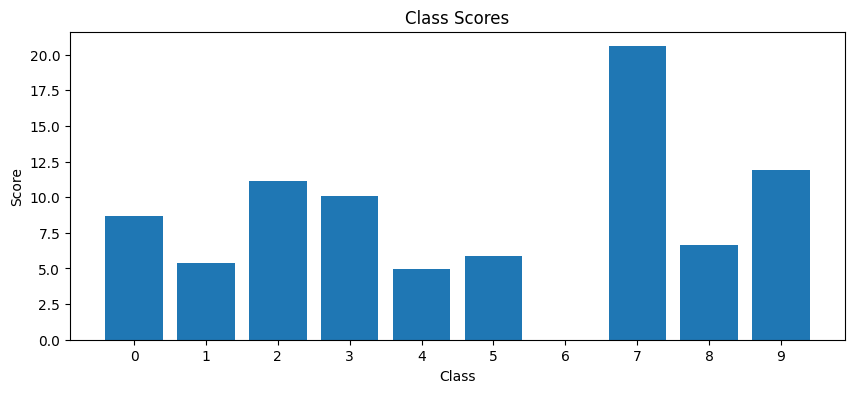

In [12]:
# Convert the scores to a 1D NumPy array
scores = my_model(inputs).tolist()
scores = np.array(scores)

# # Create a bar chart or heatmap for the scores
fig, ax = plt.subplots(figsize=(10, 4))

# If you have multiple sets of scores (e.g., for multiple data points), you can use imshow
# ax.imshow(scores, cmap='viridis', aspect='auto', extent=(0, len(scores[0]), 0, len(scores)))

# If you have a single set of scores (like in your example), you can use bar
ax.bar(range(len(scores[0])), [x+ abs(min(scores[0])) for x in scores[0]], tick_label=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xlabel("Class")
ax.set_ylabel("Score")
ax.set_title("Class Scores")

plt.show()

In [13]:
from slashml import ModelDeployment

In [14]:
# Replace `API_KEY` with your SlasML API token.
client = ModelDeployment(api_key="68b50f46b97f8c0f98fe419df240a22af3da392f")

In [ ]:
# deploy model
response = client.deploy(model_name='pytorch-model', model=my_model, requirements=['torch', 'transformers'])

/Users/faizank/workspace/experiments/live_projects/slashml/sdk_tests/venv-3.9.1/lib/python3.9/site-packages/torch/package/package_exporter.py:925: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage_type_str = obj.pickle_storage_type()


> /Users/faizank/workspace/experiments/live_projects/slashml/sdk_tests/venv-3.9.1/lib/python3.9/site-packages/torch/package/package_exporter.py(1090)close()
   1088         import pdb
   1089         pdb.set_trace()
-> 1090         self._execute_dependency_graph()
   1091         self._write_python_version()
   1092 

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user
> /Users/faizank/workspace/experiments/live_projects/slashml/sdk_tests/venv-3.9.1/lib/python3.9/site-packages/truss/model_frameworks/pytorch.py(31)serialize_model_to_directory()
     29             import pdb
     30             pdb.set_trace()
---> 31             _torch_package(
     32                 model, target_directory / TORCH_PACKAGE_FILE, modules_to_extern
     33             )



In [ ]:
prediction = client.predict(model_version_id=response.id, model_input=model_input.tolist())